
This week's assignment asks you to test a basic linear regression model for the association between your primary explanatory variable and a response variable, and to create a blog entry describing your results.

In [1]:

%run ../data-visualization/load-gapminder_df.ipynb
%who

<module 'platform' from 'C:\\Users\\Dave\\Anaconda3\\lib\\platform.py'>
DBSCAN	 HTML	 IPython	 Image	 MinMaxScaler	 PCA	 Statements	 add_facet_grid	 add_joint_plot	 
angle_between	 anova_with_moderator	 attempt_to_pickle	 chi2_contingency	 chi_square_with_moderator	 conjunctify_list	 create_binned_categories	 data_folder	 data_measures_dict	 
data_procedures_dict	 data_provider_dict	 download_url	 encoding	 euclidean	 force_correct_scale	 formal_name_dict	 gapminder_df	 get_correct_scale	 
get_min_max	 informal_name_dict	 load_object	 model_interpretation	 moderator_conclusion	 np	 number_column_list	 obj_path	 original_columns	 
os	 pd	 pdist	 pearsonr	 pearsons_with_moderator	 pickle	 re_color_and_resize_the_plot_points	 round_down	 round_up	 
saves_folder	 set_the_axes_and_title_text	 set_the_country_name_labels	 set_the_upper_left_math	 set_up_a_minimal_joint_grid	 smf	 sns	 squareform	 store_objects	 
unit_vector	 



<strong>Data preparation for this assignment:</strong>


<ol>
<li>If your explanatory variable is categorical with more than two categories, you will need to collapse it down to two categories, or subset your data to select observations from 2 categories (next week you'll learn how to analyze categorical explanatory variable with more than 2 categories).</li>
<li>If your response variable is categorical, you will need to identify a quantitative variable in the data set that you can use as a response variable for this assignment. Variables with response scales with 4-5 values that represent a change in magnitude (for example, "strongly disagree to strongly agree", "never to often") can be considered quantitative for the assignment.</li>
</ol>

In [2]:

ce_column_name = 'oil_per_person'
qr_column_name = 'income_per_person'
column_list = [qr_column_name, ce_column_name]
elite_df = gapminder_df.set_index('country_name')[column_list].dropna()
elite_df.sample(n=10)

,income_per_person,oil_per_person
country_name,,
Thailand,2712.517199,0.726250
Italy,18982.269285,1.207250
Canada,25575.352623,3.007356
Ireland,27595.091347,1.700262
Lithuania,5332.238591,0.812369
Slovak Republic,8445.526689,0.677393
Egypt,1975.551906,0.447479
Argentina,10749.419238,0.635944
"Hong Kong, China",35536.072471,2.282655



<strong>The assignment:</strong>


<ol>
<li>If you have a categorical explanatory variable, make sure one of your categories is coded "0" and generate a frequency table for this variable to check your coding. If you have a quantitative explanatory variable, center it so that the mean = 0 (or really close to 0) by subtracting the mean, and then calculate the mean to check your centering.</li>
</ol>

0    39
1    22
Name: oil_per_person, dtype: int64


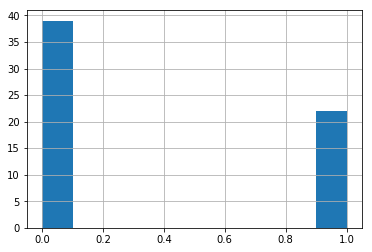

In [3]:

%matplotlib inline

# Collapse explanatory variable down to two categories
halfway_mark = elite_df[ce_column_name].mean()

def f(x, halfway_mark):
    if x < halfway_mark:
        
        return 0
    else:
        
        return 1

elite_df[ce_column_name] = elite_df[ce_column_name].map(lambda x: f(x, halfway_mark))

print(elite_df[ce_column_name].value_counts())
axes_subplot = elite_df[ce_column_name].hist()


<ol start=2>
<li>Test a linear regression model and summarize the results in a couple of sentences. Make sure to include statistical results (regression coefficients and p-values) in your summary.</li>
</ol>

In [29]:

from IPython.display import display
%matplotlib inline

# Interpret both groups
sts = Statements(elite_df, number_of_categories=2, test_type='ols',
                 ce_column_name=ce_column_name, qr_column_name=qr_column_name)
sample_name = 'the sample of ' + str(sts.row_count) + ' countries from GapMinder.org'
model_interpretation_HTML, plot_Image = model_interpretation(sts, sample_name, verbose=True)
display(model_interpretation_HTML)
display(sts.fitted.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      income_per_person   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sat, 17 Feb 2018   Prob (F-statistic):           1.68e-16
Time:                        22:25:02   Log-Likelihood:                -626.98
No. Observations:                  61   AIC:                             1258.
Df Residuals:                      59   BIC:                             1262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5297.9098   1146.251      4.622      0.000    3004.268    7591.552
C(oil_per_person)[T.1]   2.17e+04   1908.680     11.371      0.000    1.79e+04    2.55e+04
==============================================================================
Omnibus:                        9.403   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.234
Skew:                           0.675   Prob(JB):                      0.00599
Kurtosis:                       4.484   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


<strong>WHAT TO SUBMIT:</strong>


Create a blog entry where you
<ol>
<li>post your program and output, and</li>
<li>post a frequency table for your (recoded) categorical explanatory variable or report the mean for your centered explanatory variable.</li>
<li>Write a few sentences describing the results of your linear regression analysis.</li>
</ol>


### Review criteria


Your assessment will be based on the evidence you
provide that you have completed all of the steps.
When relevant, gradients in the scoring will be
available to reward clarity (for example, you will get
one point for submitting an incomplete or inaccurate summary of results, but two points if the summary of results is complete and accurate). In all cases, consider that
the peer assessing your work is likely not an expert
in the field you are analyzing. You will be assessed
equally on your description of your frequency
distributions.


### Example of how to write results for linear regression


The results of the linear regression model indicated that major depression (Beta=1.34, p=.0001) was significantly and positively associated with number of nicotine dependence symptoms.

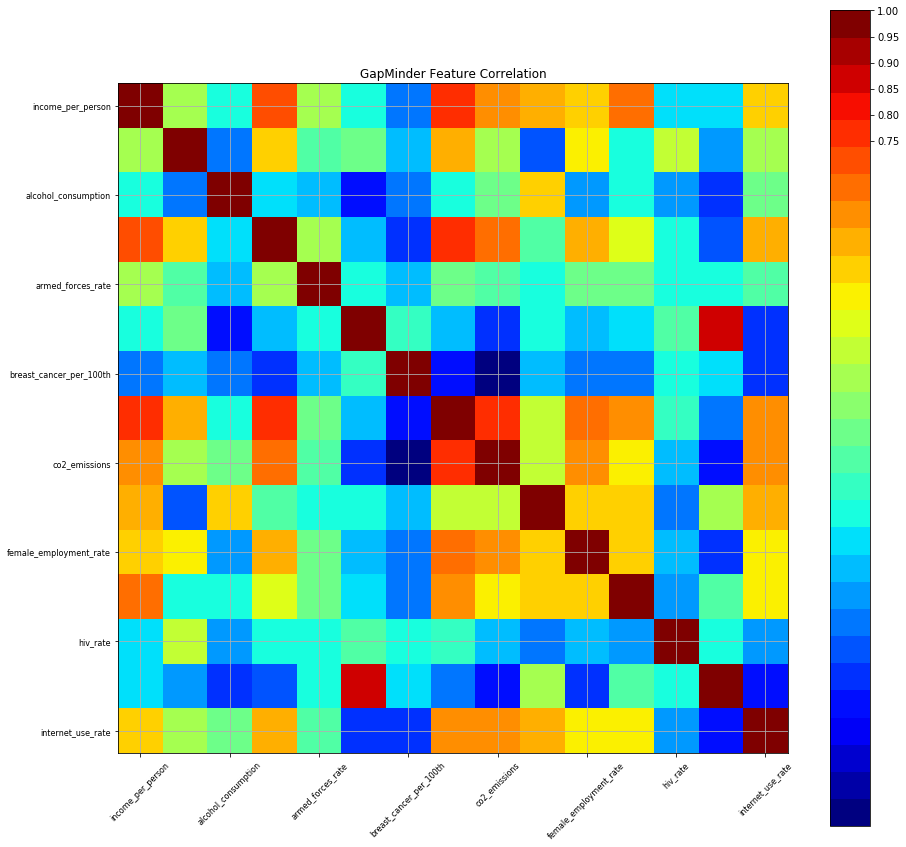

In [30]:

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm as cm

def correlation_matrix(df):

    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('GapMinder Feature Correlation')
    ax1.set_xticklabels(df.columns, fontsize=8, rotation=45)
    ax1.set_yticklabels(df.columns, fontsize=8)
    
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75, .8, .85, .90, .95, 1])

correlation_matrix(gapminder_df)

In [7]:

corr_df = elite_df.corr()

In [8]:

max_corr = 0
max_row = ''
max_col = ''
for row_name, row_series in corr_df.iterrows():
    for column_name, column_value in row_series.iteritems():
        if column_value < 1.0:
            if column_value > max_corr:
                max_corr = column_value
                max_row = row_name
                max_col = column_name

In [9]:

print(max_row, max_col, max_corr)

income_per_person oil_per_person 0.8286641150106766


In [10]:

corr_df

,income_per_person,oil_per_person
income_per_person,1.000000,0.828664
oil_per_person,0.828664,1.000000


In [31]:

%%javascript
var kernel = IPython.notebook.kernel,  
    body = document.body,  
    attribs = body.attributes,  
    command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [32]:
# %load ../../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/' + notebook_path
HTML('Click <a href="' + notebook_viewer_url + '" target="_blank">here</a> to view notebook in nbviewer.')